# Lamp Powers via Least Squares

> *Numerical Optimization and Large Scale Linear Algebra*  
> *MSc in Data Science, Department of Informatics*  
> *Athens University of Economics and Business*

---

A set of $n$ lamps illuminates an area that we divide into $m$ regions (pixels). We let $l_{i}$ denote the lighting level in region $i$, so the $m$-vector $l$ gives the illumination levels across all regions. We let $p_{i}$ denote the power at which lamp $i$ operates, so the $n$-vector $p$ gives the set of lamp powers. The vector of illumination levels is a linear function of the lamp powers, so we have $l=Ap$ for some $m \times n$ matrix $A$. The $j$th column of $A$ gives the illumination pattern for lamp $j$, i.e., the illumination when lamp $j$ has power $1$ and all other lamps are off. We will assume that $A$ has linearly independent columns (and therefore is tall). The $i$th row of $A$ gives the sensitivity of pixel $i$ to the $n$ lamp powers. Your mission is to find lamp powers that result in a desired illumination pattern $l^{des}$, such as $l^{des}=a·1$, ($1$ the vector with all ones) which is uniform illumination with value across the area. In other words, we seek $p$ so that $Ap≈l^{des}$. We can use least squares to find $\hat{p}$ that minimizes the sum square deviation from the desired illumination, $\|Ap-l^{des}\|_{2}^{2}$. As an example use $n=10$ lamps, the area being an $25\times25$ grid with $m=625$ pixels, each $1m^{2}$. The $(x,y)$ positions of lamps and their heigh above floor are:

<p style='text-align: center;'>$\{(4.1, 20.4, 4), (14.1, 21.3, 3.5), (22.6, 17.1, 6), (5.5, 12.3, 4), (12.2, 9.7, 4)\}$</p>
<p style='text-align: center;'>$\{(15.3, 13.8, 6), (21.3, 10.5, 5.5), (3.9, 3.3, 5), (13.1, 4.3, 5), (20.3, 4.2, 4.5)\}$</p>

The illumination decays with an inverse square law, so $A_{ij}$ proportional to $d^{-2}_{ij}$, where $d_{ij}$ is the $(3-D)$ distance between the center of the pixel and the lamp position. The matrix $A$ is scaled so that when all lamps have power one, the average illumination level is one. The desired illumination pattern is $1$, i.e., uniform with value $1$.

*Question 1*
<br>Create two graphs to show the illumination of the two patterns.<br> The first with all lamps set to $1$ and the other that minimize the sum square deviation with a desired uniform illumination.

*Question 2*
<br>What are the RMS errors in both cases?

*Question 3*
<br>Create the histogram of patch illumination values for all lamp powers one, and for lamp powers found by LS.

## Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, mean_squared_error
import math
%matplotlib inline

## First Case: Lamps Have Power Equal to 1

### *Pixel Centroids* 

- Initially, we are required to compute the coordinates of the center for each pixel.
- As all the pixels are situated on the ground, their corresponding heights can be considered as zero.
- The total area comprises a grid of dimensions $25\times25$, constituting a total of $625$ pixels, with each pixel covering an area of $1m^{2}$.
- Consequently, the centers will be positioned at half of the pixel dimensions, specifically $0.5m\times0.5m$.
##### *Calculate the center of each pixel*

In [2]:
def get_centroids(length, width, dim):
    
    #list that contains the pixel centroids
    pixels = []

    #horizontal
    for i in range(length):
        pixels.append([])
        #vertical
        for j in range(width):
            pixels[i].append((i + dim, j + dim, 0))
            
    return pixels

pixels = get_centroids(25, 25, 0.5)

### *A Matrix* 

- The $j$th column of $A$ gives the illumination pattern for lamp $j$, i.e., the illumination when lamp $j$ has power $1$ and all other lamps are off
- We will assume that $A$ has linearly independent columns (and therefore is tall)
- The $i$th row of $A$ gives the sensitivity of pixel $i$ to the $n$ lamp powers
- Therefore, matrix A will end up with a shape $625 \times 10$
- The illumination decays with an inverse square law, so $A_{ij}$ is proportional to $d^{-2}_{ij}$, the $(3D)$ distance between the center of the pixel and the lamp position

##### *List that contains the lamp coordinades*

In [3]:
lamps = [[4.1, 20.4, 4],[14.1, 21.3, 3.5],[22.6, 17.1, 6],[5.5, 12.3, 4],[12.2, 9.7, 4],[15.3, 13.8, 6],\
                          [21.3, 10.5, 5.5],[3.9, 3.3, 5],[13.1, 4.3, 5],[20.3, 4.2, 4.5]]
print(lamps)

[[4.1, 20.4, 4], [14.1, 21.3, 3.5], [22.6, 17.1, 6], [5.5, 12.3, 4], [12.2, 9.7, 4], [15.3, 13.8, 6], [21.3, 10.5, 5.5], [3.9, 3.3, 5], [13.1, 4.3, 5], [20.3, 4.2, 4.5]]


##### *Construct A Matrix*

In [4]:
def get_A(pixels,lamps):
    
    A = [] 

    #rows
    for row in pixels:
        #pixels in row
        for pixel in row:       
            temp = []     
            #lamps
            for lamp in lamps:
                d = (np.linalg.norm(np.asarray(pixel) - np.asarray(lamp)))**-2
                temp.append(d)
            
            A.append(temp)
    
    return A

A = get_A(pixels,lamps)
print(np.shape(A))

(625, 10)


### *Initial Lamp Powers*

- We let $p_{i}$ denote the power at which lamp $i$ operates, so the $n$-vector $p$ gives the set of lamp powers
- We let $l_{i}$ denote the lighting level in region $i$, so the $m$-vector $l$ gives the illumination levels across all regions
- The vector of illumination levels is a linear function of the lamp powers, so we have $l=Ap$ for some $m\times{n}$ matrix $A$

##### *Initialize the power of each lamp and calculate the average illumination level when all lamps have power equal to one*

In [5]:
#lamp powers
P_one = np.ones((10,))

#illumination levels of each pixel
L = np.dot(A,P_one)

print('Average Illumination Level (power = 1): ', np.mean(L))

Average Illumination Level (power = 1):  0.0959608009808917


### *Scaled A Matrix*

- The matrix $A$ is scaled so that when all lamps have power one, the average illumination level is one.

##### *scale matrix A for it to have an average illumination level of one*

In [6]:
#define incement for scaling
increment = (1 - np.mean(L)) / np.mean(L)
increment

#scaled A Matrix
Scaled_A = np.asarray(A) + (np.asarray(A) * increment)

#illumination levels for scaled A
L_Scaled = np.dot(Scaled_A,P_one)

print('Average Illumination Level (power = 1, A is scaled): ', np.mean(L_Scaled))

Average Illumination Level (power = 1, A is scaled):  1.0000000000000002


##### *RMSE*

In [7]:
rms_one = math.sqrt(mean_squared_error(np.ones(625),L_Scaled))
print('RMS Error for Lamp power equal to one: {:.5f}'.format(rms_one))

RMS Error for Lamp power equal to one: 0.24174


#### *Illumination Pattern* 

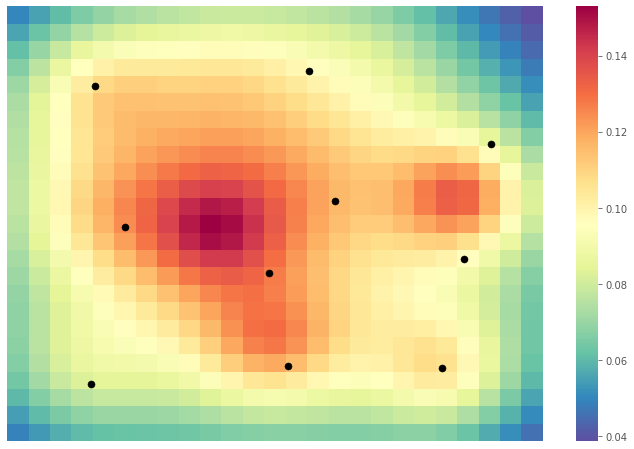

In [8]:
region = np.reshape(L,(25,25))

plt.figure(figsize=(12,8))
ax = sns.heatmap(region, cmap='Spectral_r')
ax.invert_yaxis()

plt.scatter(np.asarray(lamps)[:,0], np.asarray(lamps)[:,1], s=50, c = 'black')
plt.xticks([])
plt.yticks([])
plt.show()

## Case 2: Lamp Powers - Least Squares 

### *Lamp Powers Estimates* 

- We need to find lamp powers that result in a desired illumination pattern $l^{des}$, such as $l^{des}=a·1$, ($1$ the vector with all ones)
- The desired illumination pattern is $1$, i.e., uniform with value $1$ across the area
- In other words, we seek $p$ so that $Ap≈l^{des}$
- We can use least squares to find $\hat{p}$ that minimizes the sum square deviation from the desired illumination, $\|Ap-l^{des}\|_{2}^{2}$

##### *Estimate the lamp powers to achieve uniform illumination pattern using Least Squares*

In [9]:
#all regions should have the same illumination level
L_des = np.ones((625,))

#use of the QR Factorization method to solve the LS problem
q, r = np.linalg.qr(Scaled_A)
p = np.dot(q.T, L_des)
lamp_powers = np.dot(np.linalg.inv(r), p)
print(lamp_powers)

[1.46211018 0.78797433 2.96641047 0.74358042 0.08317333 0.21263945
 0.21218408 2.05114815 0.90760315 1.47222464]


#### *Illumination Levels* 

In [10]:
#illumination levels of each pixel
L_LS = np.dot(Scaled_A,lamp_powers)

print('Average Illumination Level (power from LS): ', np.mean(L_LS))

Average Illumination Level (power from LS):  0.9802905127483478


##### *RMSE*

In [11]:
rms_ls = math.sqrt(mean_squared_error(L_des,L_LS))
print('RMS Error for Optimal Lamp Power: {:.5f}'.format(rms_ls))

RMS Error for Optimal Lamp Power: 0.14039


#### *Illumination Pattern* 

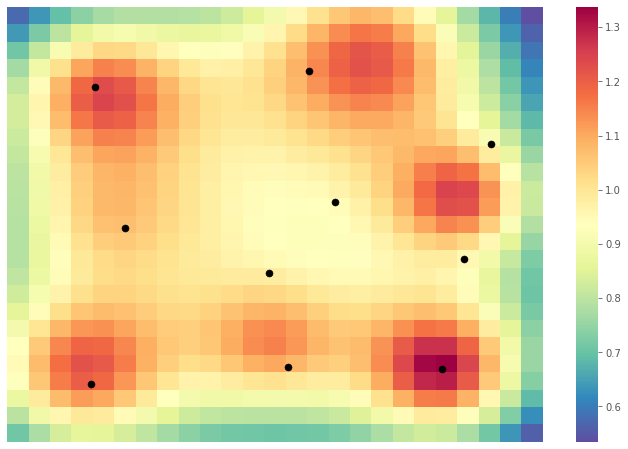

In [12]:
region_LS = np.reshape(L_LS,(25,25))

plt.figure(figsize=(12,8))
ax = sns.heatmap(region_LS, cmap='Spectral_r')
ax.invert_yaxis()

plt.scatter(np.asarray(lamps)[:,0], np.asarray(lamps)[:,1], s=50, c = 'black')
plt.xticks([])
plt.yticks([])
plt.show()

- As we can see the resulting illumination pattern of the region is now closer to uniform.

## Histograms

##### *Histogram of patch illumination values for all lamp powers equal to one and for lamp powers found by LS*

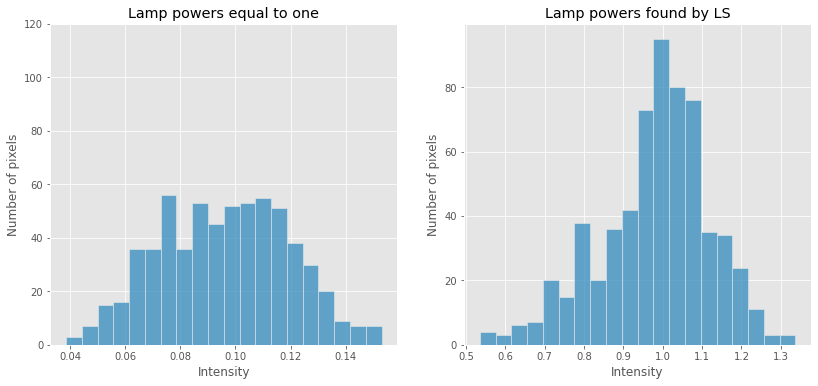

In [13]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

# plot for lamp powers 1
sns.histplot(L, bins=20, ax=ax[0])
ax[0].set_xlabel('Intensity')
ax[0].set_ylabel('Number of pixels')
ax[0].set_ylim(0,120)
ax[0].set_title('Lamp powers equal to one')

# plot for lamp powers found by LS
sns.histplot(L_LS, bins=20, ax=ax[1])
ax[1].set_xlabel('Intensity')
ax[1].set_ylabel('Number of pixels')
ax[1].set_title('Lamp powers found by LS')
plt.tight_layout(pad=3)
plt.show()